## Concepts and Implementation of Deep learning in Python - Neural Networks

Scipy >= 0.17.0

Numpy >= 1.11.0

Matplotlib >= 1.5.1

Pandas >= 0.18.0

Scikit-learn >= 0.17.1

In [1]:
# importing modules
import scipy as sc
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib as mpl

In [3]:
# Verifying the module versions
print('scipy == {}'.format(sc.__version__))
print('pandas == {}'.format(pd.__version__))
print('numpy == {}'.format(np.__version__))
print('scikit-learn == {}'.format(sk.__version__))
print('matplotlib == {}'.format(mpl.__version__))

scipy == 1.4.1
pandas == 0.25.3
numpy == 1.16.2
scikit-learn == 0.20.2
matplotlib == 3.0.2


In [4]:
# Python version
!pip3 --version

pip 20.0.2 from /home/michael/.local/lib/python3.7/site-packages/pip (python 3.7)


In [ ]:
# Install theano for deep learning
!pip install Theano

In [7]:
# Example with theano library
import theano
from theano import tensor
# declare two symbolic floating-point scalars
a = tensor.dscalar()
b = tensor.dscalar()

In [8]:
# Create a simple symbolic expression
c = a + b
# convert the expression into a callable object that takes a and b and computes c.
f = theano.function([a, b], c)
# create the inputs to calculate
result = f(1.5, 2.5)
print(result)

4.0


In [9]:
def f(a, b):
    c = a + b
    return c
f(1.5, 2.5)

4.0

In [12]:
# import Tensorflow
import tensorflow as tf
tf.__version__

'2.1.0'

In [ ]:
# Example using tensorflow library.
# declare symbolic floating-point scalars
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)
# create a simple symbolic expression
add = tf.add(a, b)
# bind values to a and b
sess = tf.Session()
bind = {a: 1.5, b : 2.5}
c = sess.run(add, feed_dict=bind)
print(c)

In [1]:
import keras
keras.__version__

Using TensorFlow backend.


'2.3.1'

You can change the backend to any of Tensorflow or Theano to leverage on their computational properties while using the minimalist Keras API.

Simply search for the directory ~/.keras/ and edit the backend property in the keras.json file.

y_pred = Activation(W0 + W1*X1 + .....+ Wn*Xn)

initialize w0

w0*X1 = yhat

a = derivative(yhat-y)

w1 = w - a*learn_rate

w1*X2 = yhat2

.
.
.
.

wn

new test

wn*X = y_predict

Steps to design your Neural Network model
1. Load Data.
2. Define Model.
3. Compile Model.
4. Fit Model.
5. Evaluate Model.
6. Tie It All Together.

In [5]:
# Let's get an already cleaned dataset from the github repo.
!wget https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv

--2020-02-26 19:29:58--  https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.172.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.172.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23278 (23K) [text/plain]
Saving to: ‘pima-indians-diabetes.data.csv’

pima-indians-diabet 100%[===================>]  22.73K  --.-KB/s    in 0.08s   

2020-02-26 19:29:59 (279 KB/s) - ‘pima-indians-diabetes.data.csv’ saved [23278/23278]



In [6]:
# List the files in your current directory
!ls

'Deep Learning With Tensorflow, Keras, Theano, Python.ipynb'
'Linear Algebra and Basics Mathematics..ipynb'
 pima-indians-diabetes.data.csv


#### 1. Load data

In [7]:
# Import useful modules for neural networks
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

1. Number of times pregnant.
2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test.
3. Diastolic blood pressure (mm Hg).
4. Triceps skin fold thickness (mm).
5. 2-Hour serum insulin (mu U/ml).
6. Body mass index.
7. Diabetes pedigree function.
8. Age (years).
9. Class, onset of diabetes within five years.

In [21]:
# Verify your random initialization
np.random.randint(1, 12)

1

In [8]:
# load the dataset
dataset = np.loadtxt('pima-indians-diabetes.data.csv', delimiter = ',')
# split into input(X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]
X.shape, Y.shape

((768, 8), (768,))

#### 2. Define Model

In [11]:
# Create model
model = Sequential() # Call the keras sequential function, then add layers
model.add(Dense(12, input_dim = 8, kernel_initializer='uniform', activation='relu'))
model.add(Dense(8, kernel_initializer='uniform', activation='relu'))
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))

In [13]:
# Get the model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 12)                108       
_________________________________________________________________
dense_5 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 9         
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


Number of trainable parameters:

    = connections between layers + biases in every layer
    = (8 * 12 + 12 * 8 + 8 * 1) + (12 + 8 + 1)
    = 221

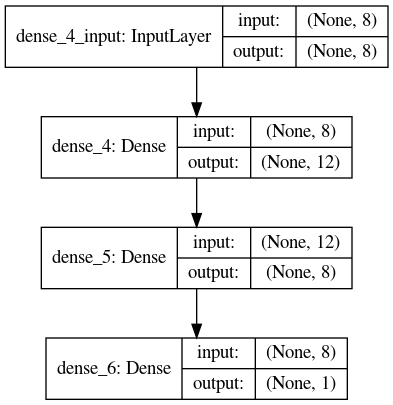

In [14]:
# Plot the model we have designed
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

#### 3. Compile Model

In [16]:
# compile the model
model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])

#### 4. Fit the Model

In [25]:
# Fit the model
model.fit(X, Y, nb_epoch= 200, batch_size=10)

Epoch 1/200
768/768 [==============================] - 0s 133us/step - loss: 0.4409 - accuracy: 0.7747
Epoch 2/200
330/768 [===========>..................] - ETA: 0s - loss: 0.4272 - accuracy: 0.8061

/usr/lib/python3/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


768/768 [==============================] - 0s 150us/step - loss: 0.4453 - accuracy: 0.7865
Epoch 3/200
768/768 [==============================] - 0s 129us/step - loss: 0.4424 - accuracy: 0.7865
Epoch 4/200
768/768 [==============================] - 0s 132us/step - loss: 0.4394 - accuracy: 0.7773
Epoch 5/200
768/768 [==============================] - 0s 132us/step - loss: 0.4539 - accuracy: 0.7839
Epoch 6/200
768/768 [==============================] - 0s 116us/step - loss: 0.4392 - accuracy: 0.7943
Epoch 7/200
768/768 [==============================] - 0s 132us/step - loss: 0.4352 - accuracy: 0.7969
Epoch 8/200
768/768 [==============================] - 0s 122us/step - loss: 0.4373 - accuracy: 0.7891
Epoch 9/200
768/768 [==============================] - 0s 122us/step - loss: 0.4393 - accuracy: 0.7969
Epoch 10/200
768/768 [==============================] - 0s 120us/step - loss: 0.4385 - accuracy: 0.7891
Epoch 11/200
768/768 [==============================] - 0s 140us/step - loss: 0.4413

768/768 [==============================] - 0s 100us/step - loss: 0.4167 - accuracy: 0.8112
Epoch 82/200
768/768 [==============================] - 0s 123us/step - loss: 0.4135 - accuracy: 0.8112
Epoch 83/200
768/768 [==============================] - 0s 123us/step - loss: 0.4113 - accuracy: 0.8099
Epoch 84/200
768/768 [==============================] - 0s 110us/step - loss: 0.4098 - accuracy: 0.8060
Epoch 85/200
768/768 [==============================] - 0s 108us/step - loss: 0.4188 - accuracy: 0.8060
Epoch 86/200
768/768 [==============================] - 0s 110us/step - loss: 0.4068 - accuracy: 0.8138
Epoch 87/200
768/768 [==============================] - 0s 120us/step - loss: 0.4066 - accuracy: 0.8125
Epoch 88/200
768/768 [==============================] - 0s 111us/step - loss: 0.4384 - accuracy: 0.7852
Epoch 89/200
768/768 [==============================] - 0s 110us/step - loss: 0.4202 - accuracy: 0.8034
Epoch 90/200
768/768 [==============================] - 0s 111us/step - loss:

#### 5. Evaluate Model.

In [22]:
# These are the metrics our model with keep note of
model.metrics_names

['loss', 'accuracy']

In [26]:
# These are the scores for the model metrics
scores

[0.4253038975099723, 0.80078125]

In [24]:
# evaluate the model
scores = model.evaluate(X, Y)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

768/768 [==============================] - 0s 14us/step
accuracy: 80.08%


#### 6.Tie It All Together.

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

# load the dataset
dataset = np.loadtxt('pima-indians-diabetes.data.csv', delimiter = ',')
# split into input(X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]
X.shape, Y.shape

# Create model
model = Sequential()
model.add(Dense(12, input_dim = 8, kernel_initializer='uniform', activation='relu'))
model.add(Dense(8, kernel_initializer='uniform', activation='relu'))
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))

# compile the model
model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model
model.fit(X, Y, nb_epoch= 150, batch_size=10)

# evaluate the model
scores = model.evaluate(X, Y)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

Now we have built a neural network for the Pima Indians Dataset, what's next?

## Chapter 8: Evaluate the performance of Deep learning models.

Most of the decisions of network architecture must be resolved empirically through trial and error and evaluating them on real data.

#### 1. Automatic verification dataset

In [27]:
# from keras.models import Sequential
# from keras.layers import Dense
# import numpy as np
# fix random seed for reproducibility
# seed = 7
# np.random.seed(seed)

# load the dataset
dataset = np.loadtxt('pima-indians-diabetes.data.csv', delimiter = ',')
# split into input(X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]
# X.shape, Y.shape

# Create sequential model
model = Sequential()
model.add(Dense(12, input_dim = 8, kernel_initializer='uniform', activation='relu'))
model.add(Dense(8, kernel_initializer='uniform', activation='relu'))
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))

# compile the model
model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model using validation split
model.fit(X, Y, validation_split=0.33, nb_epoch= 150, batch_size=10)

# evaluate the model
scores = model.evaluate(X, Y)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

/usr/lib/python3/dist-packages/ipykernel_launcher.py:25: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 514 samples, validate on 254 samples
Epoch 1/150
514/514 [==============================] - 0s 266us/step - loss: 0.6792 - accuracy: 0.6265 - val_loss: 0.6570 - val_accuracy: 0.6732
Epoch 2/150
514/514 [==============================] - 0s 165us/step - loss: 0.6664 - accuracy: 0.6401 - val_loss: 0.6506 - val_accuracy: 0.6772
Epoch 3/150
514/514 [==============================] - 0s 200us/step - loss: 0.6570 - accuracy: 0.6420 - val_loss: 0.6423 - val_accuracy: 0.6772
Epoch 4/150
514/514 [==============================] - 0s 187us/step - loss: 0.6469 - accuracy: 0.6518 - val_loss: 0.6446 - val_accuracy: 0.6614
Epoch 5/150
514/514 [==============================] - 0s 149us/step - loss: 0.6481 - accuracy: 0.6693 - val_loss: 0.6328 - val_accuracy: 0.6772
Epoch 6/150
514/514 [==============================] - 0s 191us/step - loss: 0.6434 - accuracy: 0.6673 - val_loss: 0.6277 - val_accuracy: 0.6929
Epoch 7/150
514/514 [==============================] - 0s 219us/step - loss: 0.6349 

Epoch 57/150
514/514 [==============================] - 0s 173us/step - loss: 0.5351 - accuracy: 0.7432 - val_loss: 0.5508 - val_accuracy: 0.7244
Epoch 58/150
514/514 [==============================] - 0s 218us/step - loss: 0.5355 - accuracy: 0.7237 - val_loss: 0.5480 - val_accuracy: 0.7165
Epoch 59/150
514/514 [==============================] - 0s 148us/step - loss: 0.5356 - accuracy: 0.7490 - val_loss: 0.5512 - val_accuracy: 0.7402
Epoch 60/150
514/514 [==============================] - 0s 217us/step - loss: 0.5321 - accuracy: 0.7374 - val_loss: 0.5875 - val_accuracy: 0.6732
Epoch 61/150
514/514 [==============================] - 0s 144us/step - loss: 0.5314 - accuracy: 0.7354 - val_loss: 0.5518 - val_accuracy: 0.7126
Epoch 62/150
514/514 [==============================] - 0s 189us/step - loss: 0.5301 - accuracy: 0.7354 - val_loss: 0.5602 - val_accuracy: 0.7047
Epoch 63/150
514/514 [==============================] - 0s 162us/step - loss: 0.5404 - accuracy: 0.7432 - val_loss: 0.5484 -

Epoch 113/150
514/514 [==============================] - 0s 158us/step - loss: 0.4926 - accuracy: 0.7743 - val_loss: 0.5363 - val_accuracy: 0.7402
Epoch 114/150
514/514 [==============================] - 0s 179us/step - loss: 0.4960 - accuracy: 0.7432 - val_loss: 0.5310 - val_accuracy: 0.7402
Epoch 115/150
514/514 [==============================] - 0s 165us/step - loss: 0.5031 - accuracy: 0.7568 - val_loss: 0.5209 - val_accuracy: 0.7520
Epoch 116/150
514/514 [==============================] - 0s 219us/step - loss: 0.5043 - accuracy: 0.7568 - val_loss: 0.5212 - val_accuracy: 0.7244
Epoch 117/150
514/514 [==============================] - 0s 157us/step - loss: 0.4937 - accuracy: 0.7821 - val_loss: 0.5192 - val_accuracy: 0.7677
Epoch 118/150
514/514 [==============================] - 0s 186us/step - loss: 0.4927 - accuracy: 0.7626 - val_loss: 0.5310 - val_accuracy: 0.7402
Epoch 119/150
514/514 [==============================] - 0s 169us/step - loss: 0.4918 - accuracy: 0.7529 - val_loss: 0

#### 2. Using manual validation set

In [29]:
# from keras.models import Sequential
# from keras.layers import Dense
# import numpy as np
from sklearn.model_selection import train_test_split
# fix random seed for reproducibility
# seed = 7
# np.random.seed(seed)

# load the dataset
dataset = np.loadtxt('pima-indians-diabetes.data.csv', delimiter = ',')
# split into input(X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]
# X.shape, Y.shape

# Split data into 67% train and 33% test
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.33, random_state = seed)

# Create sequential model
model = Sequential()
model.add(Dense(12, input_dim = 8, kernel_initializer='uniform', activation='relu'))
model.add(Dense(8, kernel_initializer='uniform', activation='relu'))
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))

# compile the model
model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model using validation split
model.fit(X_train, y_train,  validation_data = (X_test, y_test), nb_epoch= 150, batch_size=10)

# evaluate the model
scores = model.evaluate(X, Y)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

/usr/lib/python3/dist-packages/ipykernel_launcher.py:29: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 514 samples, validate on 254 samples
Epoch 1/150
514/514 [==============================] - 0s 238us/step - loss: 0.6888 - accuracy: 0.6206 - val_loss: 0.6822 - val_accuracy: 0.6378
Epoch 2/150
514/514 [==============================] - 0s 86us/step - loss: 0.6710 - accuracy: 0.6576 - val_loss: 0.6720 - val_accuracy: 0.6378
Epoch 3/150
514/514 [==============================] - 0s 83us/step - loss: 0.6619 - accuracy: 0.6576 - val_loss: 0.6673 - val_accuracy: 0.6378
Epoch 4/150
514/514 [==============================] - 0s 96us/step - loss: 0.6573 - accuracy: 0.6576 - val_loss: 0.6589 - val_accuracy: 0.6378
Epoch 5/150
514/514 [==============================] - 0s 92us/step - loss: 0.6558 - accuracy: 0.6576 - val_loss: 0.6533 - val_accuracy: 0.6378
Epoch 6/150
514/514 [==============================] - 0s 81us/step - loss: 0.6456 - accuracy: 0.6576 - val_loss: 0.6466 - val_accuracy: 0.6378
Epoch 7/150
514/514 [==============================] - 0s 108us/step - loss: 0.6420 - acc

Epoch 57/150
514/514 [==============================] - 0s 104us/step - loss: 0.5226 - accuracy: 0.7393 - val_loss: 0.5711 - val_accuracy: 0.7047
Epoch 58/150
514/514 [==============================] - 0s 97us/step - loss: 0.5245 - accuracy: 0.7393 - val_loss: 0.5658 - val_accuracy: 0.7323
Epoch 59/150
514/514 [==============================] - 0s 99us/step - loss: 0.5291 - accuracy: 0.7412 - val_loss: 0.5611 - val_accuracy: 0.7244
Epoch 60/150
514/514 [==============================] - 0s 111us/step - loss: 0.5267 - accuracy: 0.7374 - val_loss: 0.5619 - val_accuracy: 0.7323
Epoch 61/150
514/514 [==============================] - 0s 116us/step - loss: 0.5332 - accuracy: 0.7374 - val_loss: 0.5716 - val_accuracy: 0.7165
Epoch 62/150
514/514 [==============================] - 0s 155us/step - loss: 0.5239 - accuracy: 0.7374 - val_loss: 0.5678 - val_accuracy: 0.7244
Epoch 63/150
514/514 [==============================] - 0s 103us/step - loss: 0.5232 - accuracy: 0.7471 - val_loss: 0.5580 - v

In [30]:
# These are the metrics our model with keep note of
model.metrics_names

['loss', 'accuracy']

In [31]:
# These are the scores for the model metrics
scores

[0.46860550840695697, 0.7838541865348816]

#### 3. Manual K-Fold cross validation

In [32]:
# from keras.models import Sequential
# from keras.layers import Dense
# import numpy as np
from sklearn.model_selection import StratifiedKFold
# fix random seed for reproducibility
# seed = 7
# np.random.seed(seed)

# load the dataset
dataset = np.loadtxt('pima-indians-diabetes.data.csv', delimiter = ',')
# split into input(X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]
# X.shape, Y.shape

In [35]:
X.shape

(768, 8)

In [37]:
# Define 10-fold cross validation test harness
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
# Create a list to store cross validation scores
cvscores = []
for train, test in kfold.split(X,Y):
    # Create sequential model
    model = Sequential()
    model.add(Dense(12, input_dim = 8, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(8, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
    
    # compile the model
    model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    # Fit the model using validation split
    model.fit(X[train], Y[train], epochs= 150, batch_size=10, verbose=0)

    # evaluate the model
    scores = model.evaluate(X[test], Y[test], verbose=0)
    print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))
    cvscores.append(scores[1]*100)
    
print("%.2f%% (+/- %.2f%%)" %(np.mean(cvscores), np.std(cvscores)))

accuracy: 76.62%
accuracy: 74.03%
accuracy: 72.73%
accuracy: 85.71%
accuracy: 76.62%
accuracy: 79.22%
accuracy: 71.43%
accuracy: 70.13%
accuracy: 73.68%
accuracy: 77.63%
75.78% (+/- 4.28%)


## Chapter 9: Keras Models with Scikit-Learn

#### Using the Keras Classifier

In [40]:
# import modules. for cross-val and keras wrappers
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score

def create_model():
    # create model
    model = Sequential()
    model.add(Dense(12, input_dim = 8, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(8, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))    
    # compile model
    model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Set random seed
# Load data
# Split data into X and Y
# Create model
model = KerasClassifier(build_fn=create_model, epochs=150, batch_size=10, verbose=0)

# Evaluate using 10 fold cross validation
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
results = cross_val_score(model, X, Y, cv=kfold)

print(results.mean())

0.7539131879806519


#### Hyperparameter search for deep learning models

In [49]:
# import useful modules
import time
from sklearn.model_selection import GridSearchCV
start = time.time()
# Use our defined model create_model() but create defaults so our grid search can change parameters.
def create_model(kernel_initializer= 'uniform', optimizer = 'adam'):
    # create model
    model = Sequential()
    model.add(Dense(12, input_dim = 8, kernel_initializer=kernel_initializer, activation='relu'))
    model.add(Dense(8, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))    
    # compile model
    model.compile(loss = 'binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model



# Set random seed
# Load data
# Split data into X and Y
# Create model
model = KerasClassifier(build_fn=create_model, verbose = 0)

# Grid search epochs, batch_size, and optimizer
optimizers = ['rmsprop', 'adam']
init = ['glorot_uniform', 'normal', 'uniform']
epoch = np.array([50, 100, 150])
batches = np.array([5, 10, 20])
# Grid parameters
param_grid = dict(optimizer= optimizers, epochs = epoch, batch_size = batches, kernel_initializer=init)
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid_results = grid.fit(X, Y)

end = time.time()
print("Time taken in minutes: %s"%((end-start)/60))

# summarize results 
print("Best: %f using %s" % (grid_results.best_score_, grid_results.best_params_))
# for params, mean_score, scores in grid_results.cv_results_:
#     print("%f (%f) with %r" %(scores.mean(), scores.std(), params))

Time taken in minutes: 13.137764040629069
Best: 0.748698 using {'batch_size': 5, 'epochs': 150, 'kernel_initializer': 'uniform', 'optimizer': 'adam'}


ValueError: too many values to unpack (expected 3)

In [ ]:
# Print the parameters and their results
for i in ['mean_test_score', 'std_test_score', 'params']:
    print(i," : ",grid_results.cv_results_[i])

Now that we have gotten the results from our grid searching, we can use these parameters to design a better network and evaluate on it.

Best: 0.748698 using {'batch_size': 5, 'epochs': 150, 'kernel_initializer': 'uniform', 'optimizer': 'adam'}